In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [38]:
df=pd.read_csv("datasets/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
df.shape

(891, 12)

In [40]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [41]:
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

<Axes: >

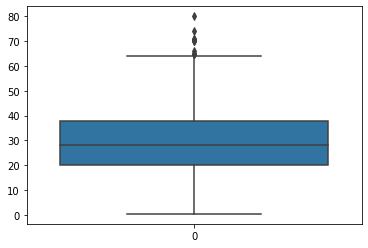

In [42]:
sns.boxplot(df["Age"])

In [43]:
np.where(df.Age>60)

(array([ 33,  54,  96, 116, 170, 252, 275, 280, 326, 438, 456, 483, 493,
        545, 555, 570, 625, 630, 672, 745, 829, 851], dtype=int64),)

In [44]:
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [45]:
upper_array = np.where(df.Age>=upper)[0]
lower_array = np.where(df.Age<=lower)[0]
 
# Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

<Axes: >

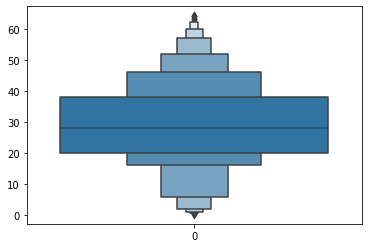

In [46]:
sns.boxenplot(df.Age)

In [47]:
df.Age.isna().any()

True

In [48]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Users\dhanu\AppData\Local\Temp\ipykernel_14940\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

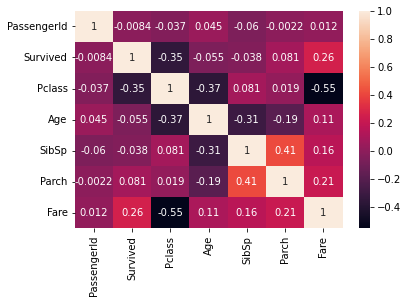

In [49]:
sns.heatmap(df.corr(),annot=True)

In [50]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [51]:
df.Name.nunique()


880

In [52]:
df.shape

(880, 12)

In [53]:
df.Name=le.fit_transform(df.Name)
df.Sex=le.fit_transform(df.Sex)
df.Ticket=le.fit_transform(df.Ticket)
df.Cabin=le.fit_transform(df.Cabin)
df.Embarked=le.fit_transform(df.Embarked)

In [54]:
df.Name

0      106
1      186
2      347
3      267
4       15
      ... 
886    540
887    297
888    407
889     79
890    216
Name: Name, Length: 880, dtype: int32

In [55]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,106,1,22.0,1,0,517,7.2500,143,2
1,2,1,1,186,0,38.0,1,0,588,71.2833,78,0
2,3,1,3,347,0,26.0,0,0,659,7.9250,143,2
3,4,1,1,267,0,35.0,1,0,48,53.1000,52,2
4,5,0,3,15,1,35.0,0,0,466,8.0500,143,2


<Axes: >

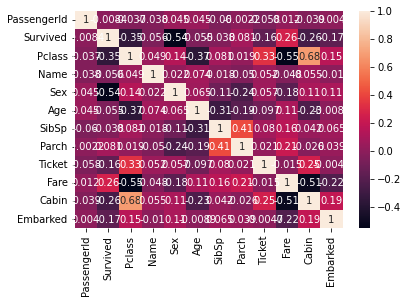

In [56]:
sns.heatmap(df.corr(),annot=True)

In [57]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,106,1,22.0,1,0,517,7.2500,143,2
1,2,1,1,186,0,38.0,1,0,588,71.2833,78,0
2,3,1,3,347,0,26.0,0,0,659,7.9250,143,2
3,4,1,1,267,0,35.0,1,0,48,53.1000,52,2
4,5,0,3,15,1,35.0,0,0,466,8.0500,143,2


In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler=StandardScaler()

In [61]:
df_scaled=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [62]:
Y=pd.DataFrame(df.Embarked)
X=df.drop(columns="Embarked")


In [63]:
X.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,106,1,22.0,1,0,517,7.2500,143
1,2,1,1,186,0,38.0,1,0,588,71.2833,78
2,3,1,3,347,0,26.0,0,0,659,7.9250,143
3,4,1,1,267,0,35.0,1,0,48,53.1000,52
4,5,0,3,15,1,35.0,0,0,466,8.0500,143


In [64]:
Y.head()

,Embarked
0,2
1,0
2,2
3,2
4,2


In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [69]:
print(f"x_train shape: {x_train.shape}\tx_test shape: {x_test.shape}\ny_train shape: {y_train.shape}\ty_test shape: {y_test.shape}")

x_train shape: (704, 11)	x_test shape: (176, 11)
y_train shape: (704, 1)	y_test shape: (176, 1)
